<a href="https://colab.research.google.com/github/tejaswini-151999/SriNagTejaswiniGandikota_INFO5731_Fall2024/blob/main/Gandikota_SriNagaTejaswini_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving research_abstracts(11).csv to research_abstracts(11).csv


In [21]:
# Write your code here

with open("research_abstracts(11).csv", "r") as file:
    lines = file.readlines()

# Filtering abstracts
abstracts = [line.split(",")[-1].strip() for line in lines[1:] if line.strip()]

# preprocess text and tokenize text
def tokenize(text):
    text = text.lower()
    words = "".join([char if char.isalnum() or char.isspace() else " " for char in text]).split()
    return words

# count trigrams
def count_trigrams(texts):
    trigram_counts = {}
    for text in texts:
        words = tokenize(text)
        for i in range(len(words) - 2):
            trigram = (words[i], words[i+1], words[i+2])
            if trigram in trigram_counts:
                trigram_counts[trigram] += 1
            else:
                trigram_counts[trigram] = 1
    return trigram_counts

# Counting
trigram_counts = count_trigrams(abstracts)

# Displaying
top_trigrams = sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 trigrams and their frequencies:")
for trigram, count in top_trigrams:
    print(f"{trigram}: {count}")







Top 10 trigrams and their frequencies:
('state', 'of', 'the'): 46
('of', 'the', 'art'): 44
('of', 'artificial', 'intelligence'): 42
('intelligence', 'a', 'modern'): 35
('intelligenceartificial', 'intelligenceartificial', 'intelligence'): 32
('intelligenceartificial', 'intelligence', 'a'): 32
('the', 'development', 'of'): 21
('a', 'modern', 'approachartificial'): 20
('artificial', 'intelligence', 'ai'): 19
('the', 'state', 'of'): 19


In [ ]:
# count bigrams and individual words
def count_bigrams(texts):
    bigram_counts = {}
    unigram_counts = {}

    for text in texts:
        words = tokenize(text)
        for i in range(len(words) - 1):
            bigram = (words[i], words[i + 1])
            if bigram in bigram_counts:
                bigram_counts[bigram] += 1
            else:
                bigram_counts[bigram] = 1
            unigram_counts[words[i]] = unigram_counts.get(words[i], 0) + 1
        if words:
            unigram_counts[words[-1]] = unigram_counts.get(words[-1], 0) + 1

    return bigram_counts, unigram_counts

# Calculating bigram and unigram counts
bigram_counts, unigram_counts = count_bigrams(abstracts)

bigram_probabilities = {}
for bigram, count in bigram_counts.items():
    bigram_probabilities[bigram] = count / unigram_counts[bigram[0]]

# Displaying top 10 bigrams
top_bigrams = sorted(bigram_probabilities.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 bigrams and their probabilities:")
for bigram, prob in top_bigrams:
    print(f"{bigram}: {prob:.2f}")


Top 10 bigrams and their probabilities:
('pursuing', 'a'): 1.00
('moves', 'beyond'): 1.00
('societal', 'influences'): 1.00
('leap', 'and'): 1.00
('exploring', 'applications'): 1.00
('modifies', 'the'): 1.00
('john', 'h'): 1.00
('h', 'holland'): 1.00
('holland', 'is'): 1.00
('psychology', 'and'): 1.00


In [ ]:
# detect noun phrases
def extract_noun_phrases(words):
    noun_phrases = []
    for i in range(len(words) - 1):
        if words[i].isalpha() and words[i+1].isalpha():
            phrase = f"{words[i]} {words[i + 1]}"
            noun_phrases.append(phrase)
    return noun_phrases

# noun phrases
noun_phrase_counts = {}
abstract_noun_phrases = []

for text in abstracts:
    words = tokenize(text)
    noun_phrases = extract_noun_phrases(words)
    abstract_noun_phrases.append(noun_phrases)
    for phrase in noun_phrases:
        noun_phrase_counts[phrase] = noun_phrase_counts.get(phrase, 0) + 1

# maximum frequency
max_frequency = max(noun_phrase_counts.values())

# relative probabilities
relative_probabilities = []
for phrases in abstract_noun_phrases:
    abstract_probs = {}
    for phrase in phrases:
        abstract_probs[phrase] = noun_phrase_counts[phrase] / max_frequency
    relative_probabilities.append(abstract_probs)

print("Relative Probabilities Table (first 5 abstracts):")
for i, probs in enumerate(relative_probabilities[:5], 1):
    print(f"Abstract {i}: {probs}")


Relative Probabilities Table (first 5 abstracts):
Abstract 1: {}
Abstract 2: {'including the': 0.035555555555555556, 'the possible': 0.044444444444444446, 'possible need': 0.017777777777777778, 'need for': 0.035555555555555556, 'for pursuing': 0.017777777777777778, 'pursuing a': 0.017777777777777778, 'a new': 0.08444444444444445, 'new paradigm': 0.017777777777777778, 'paradigm that': 0.022222222222222223, 'that moves': 0.017777777777777778, 'moves beyond': 0.017777777777777778, 'beyond next': 0.017777777777777778, 'next word': 0.017777777777777778, 'word prediction': 0.017777777777777778, 'prediction we': 0.017777777777777778, 'we conclude': 0.035555555555555556, 'conclude with': 0.022222222222222223, 'with reflections': 0.017777777777777778, 'reflections on': 0.035555555555555556, 'on societal': 0.017777777777777778, 'societal influences': 0.017777777777777778, 'influences of': 0.017777777777777778, 'of the': 1.0, 'the recent': 0.04, 'recent technological': 0.017777777777777778, 'tech

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
import pandas as pd
import re
import math
from collections import Counter

df = pd.read_csv('research_abstracts(11).csv')

print("Columns in DataFrame:", df.columns)

# Preprocess
def preprocess(text):
    if pd.isna(text):
        return []
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.split()

df['processed'] = df['Abstract'].apply(preprocess)

# Term Frequency (TF)
def compute_tf(doc):
    term_count = Counter(doc)
    total_terms = len(doc)
    return {word: count / total_terms for word, count in term_count.items()}

df['tf'] = df['processed'].apply(compute_tf)

# Inverse Document Frequency (IDF)
def compute_idf(corpus):
    num_docs = len(corpus)
    doc_freq = {}

    for doc in corpus:
        unique_terms = set(doc)
        for term in unique_terms:
            doc_freq[term] = doc_freq.get(term, 0) + 1

    return {term: math.log(num_docs / count) for term, count in doc_freq.items()}

idf = compute_idf(df['processed'])

# TF-IDF
def compute_tfidf(tf, idf):
    return {word: tf_value * idf.get(word, 0) for word, tf_value in tf.items()}

df['tfidf'] = df.apply(lambda row: compute_tfidf(row['tf'], idf), axis=1)

# TF-IDF matrix
print(df[['Abstract', 'tfidf']])


Columns in DataFrame: Index(['Title', 'Abstract'], dtype='object')
                                               Abstract  \
0                                                   NaN   
1     Artificial intelligence (AI) researchers have ...   
2                                                   NaN   
3     At the dawn of the fourth industrial revolutio...   
4     Explainable Artificial Intelligence (XAI) has ...   
...                                                 ...   
1595  Information extraction (IE) maps a language st...   
1596  Relation extraction has been widely used for f...   
1597  Relation extraction is a fundamental task in i...   
1598  We present a new keyword extraction algorithm ...   
1599  Analysis of opinions, known as opinion mining ...   

                                                  tfidf  
0                                                    {}  
1     {'artificial': 0.00806345740155685, 'intellige...  
2                                                 

In [ ]:
import numpy as np

query = "An Outstanding movie with a haunting performance and best character development"

query_processed = preprocess(query)

# TF for the query
query_tf = compute_tf(query_processed)

# TF-IDF for the query
query_tfidf = compute_tfidf(query_tf, idf)

# Cosine similarity
def cosine_similarity(vec1, vec2):
    common_terms = set(vec1.keys()).intersection(set(vec2.keys()))
    dot_product = sum(vec1[term] * vec2[term] for term in common_terms)
    norm_vec1 = np.sqrt(sum(value ** 2 for value in vec1.values()))
    norm_vec2 = np.sqrt(sum(value ** 2 for value in vec2.values()))

    if norm_vec1 == 0 or norm_vec2 == 0:
        return 0.0

    return dot_product / (norm_vec1 * norm_vec2)

similarities = []
for idx, row in df.iterrows():
    similarity = cosine_similarity(query_tfidf, row['tfidf'])
    similarities.append(similarity)

df['cosine_similarity'] = similarities

df_sorted = df.sort_values(by='cosine_similarity', ascending=False)

print(df_sorted[['Abstract', 'cosine_similarity']])


                                               Abstract  cosine_similarity
395   Artificial intelligence (AI) using deep-learni...           0.100634
1093  Artificial intelligence (AI) using deep-learni...           0.100634
361   This report presents a broad look at the Ameri...           0.084605
1060  This report presents a broad look at the Ameri...           0.084605
1521  Here we present work on using spatial knowledg...           0.076343
...                                                 ...                ...
756                                                 NaN           0.000000
760                                                 NaN           0.000000
761                                                 NaN           0.000000
763                                                 NaN           0.000000
800                                                 NaN           0.000000

[1600 rows x 2 columns]


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import re
nltk.download('punkt')

df = pd.read_csv('/content/research_abstracts(11).csv')

print("Columns in the CSV:", df.columns)


def preprocess(text):
    text = re.sub(r'[^\w\s]', '', str(text))
    tokens = word_tokenize(text.lower())
    return tokens

df['processed_text'] = df[df.columns[0]].apply(preprocess)

# Word2Vec model
model = Word2Vec(sentences=df['processed_text'], vector_size=300, window=5, min_count=1, workers=4)

model.save('word2vec.model')

print("Word2Vec model trained and saved as 'word2vec.model'.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Columns in the CSV: Index(['Title', 'Abstract'], dtype='object')
Word2Vec model trained and saved as 'word2vec.model'.


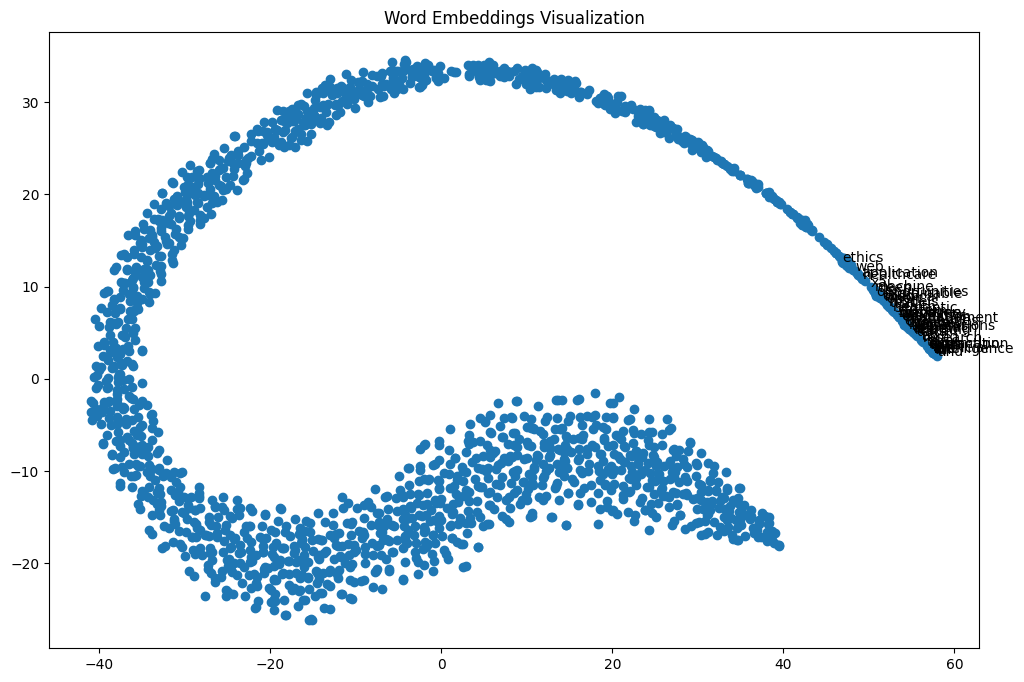

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model = Word2Vec.load('word2vec.model')

# word vectors
words = list(model.wv.index_to_key)
word_vectors = model.wv[words]

tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

# word embeddings
plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

for i, word in enumerate(words[:50]):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.title("Word Embeddings Visualization")
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:
#https://github.com/tejaswini-151999/SriNagTejaswiniGandikota_INFO5731_Fall2024/blob/main/sentiment_reviews.csv


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer : Given time is very less. We got 1 day after after we could complete the in-class assignment. Kindly please try to give more time.